In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


Data Exploration and Summary Statistics

In [2]:
data = pd.read_csv("dataset.csv")
pd.set_option('display.max_columns', None)

In [3]:
data.describe()

,WindSpeed,WindDirection,PitchAngle,Temperature,Power
count,192082.000000,192082.000000,192082.000000,192082.000000,192082.000000
mean,7.102844,258.584701,2.846931,16.430608,800.963201
std,2.827063,96.937686,15.853573,7.143782,752.072157
min,0.000000,0.000000,-3.500000,-3.000000,-32.400002
25%,5.100000,140.000000,-2.800000,10.000000,157.699997
50%,7.200000,320.899994,-2.400000,18.000000,594.450012
75%,9.000000,332.500000,-1.100000,22.000000,1285.300049
max,25.799999,1000.000000,88.400002,38.000000,3001.000000


In [4]:
data.isna().sum()

TimeStamp          0
WindSpeed        734
WindDirection    734
PitchAngle       734
Temperature      734
Power            734
dtype: int64

In [5]:
data.duplicated().sum() 

0

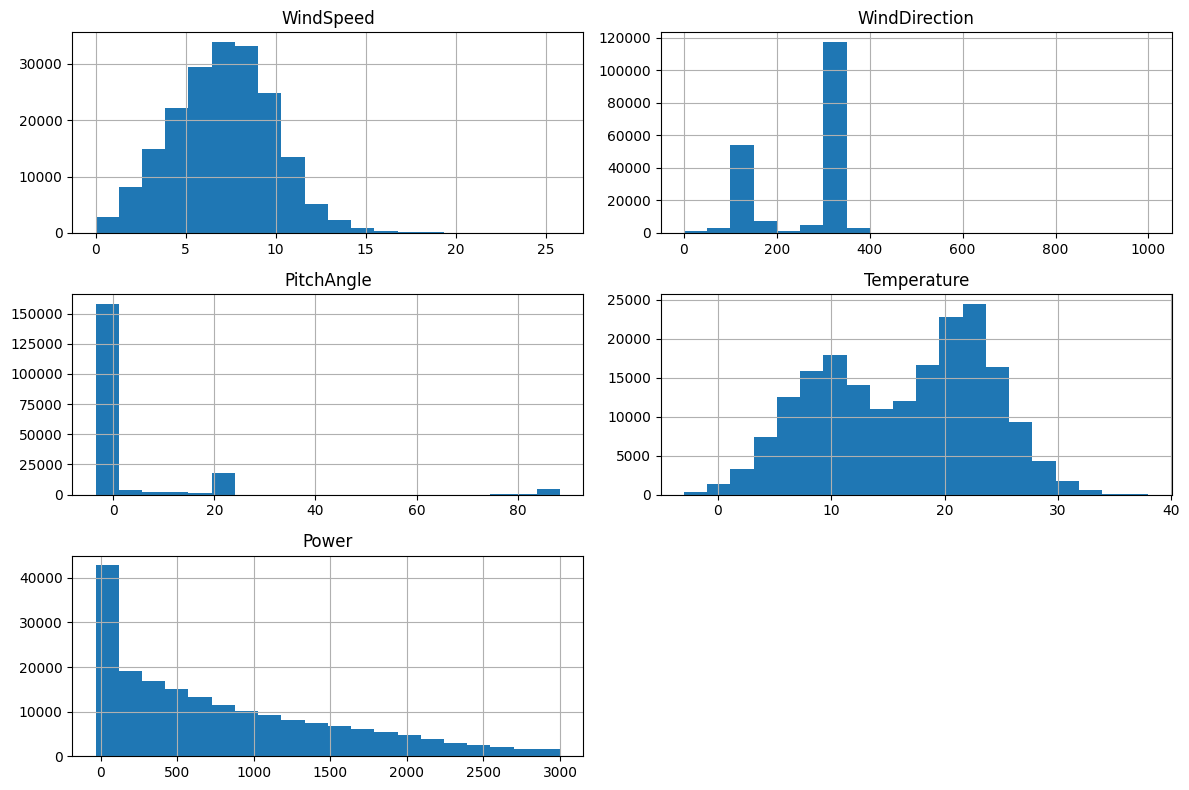

In [6]:
# Plot histograms for each variable
data.hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

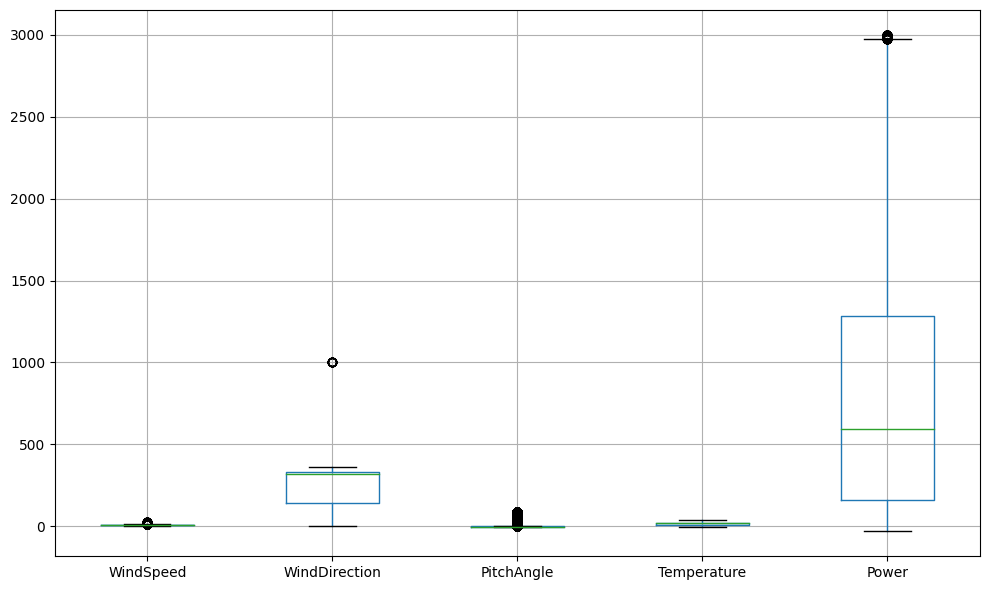

In [7]:
data.boxplot(figsize=(10, 6))
plt.tight_layout()
plt.show()

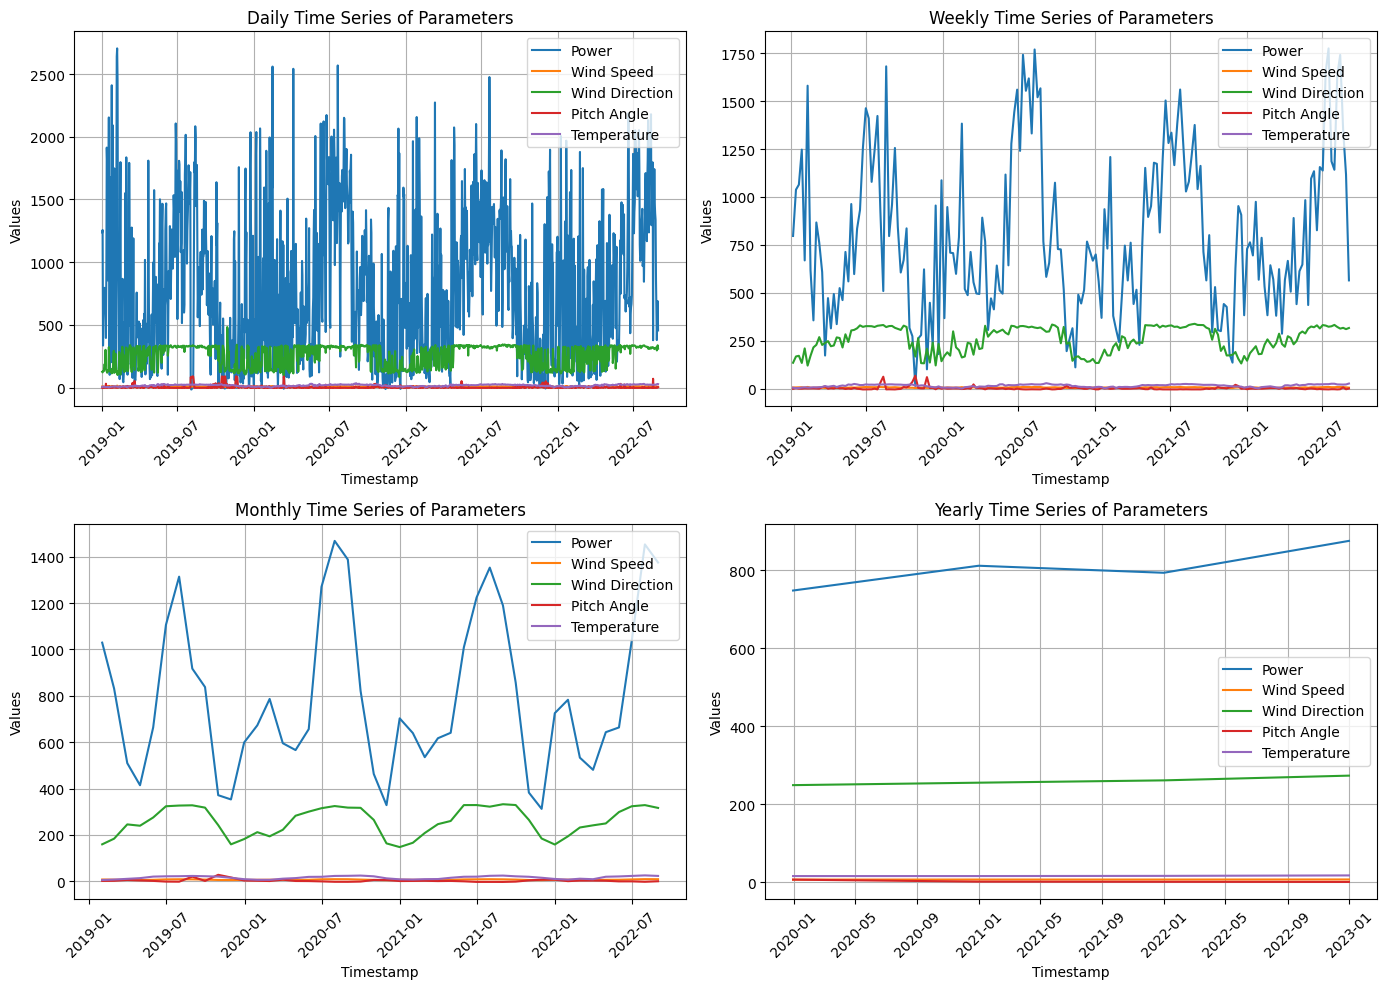

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'TimeStamp' column to datetime format
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])

# Set 'TimeStamp' as the index for easy resampling
data.set_index('TimeStamp', inplace=True)

# Resample data for different time intervals
daily_data = data.resample('D').mean()  # Daily average
weekly_data = data.resample('W').mean()  # Weekly average
monthly_data = data.resample('M').mean()  # Monthly average
yearly_data = data.resample('Y').mean()  # Yearly average

# Define a function to plot the time series of parameters
def time_series_of_parameters(data, title, position):
    plt.subplot(2, 2, position)
    plt.plot(data.index, data['Power'], label='Power')
    plt.plot(data.index, data['WindSpeed'], label='Wind Speed')
    plt.plot(data.index, data['WindDirection'], label='Wind Direction')
    plt.plot(data.index, data['PitchAngle'], label='Pitch Angle')
    plt.plot(data.index, data['Temperature'], label='Temperature')
    plt.legend()
    plt.xlabel('Timestamp')
    plt.ylabel('Values')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.grid(True)

# Create a 2x2 grid layout for the plots
plt.figure(figsize=(14, 10))

# Plot the time series for each resampled data
time_series_of_parameters(daily_data, 'Daily Time Series of Parameters', 1)
time_series_of_parameters(weekly_data, 'Weekly Time Series of Parameters', 2)
time_series_of_parameters(monthly_data, 'Monthly Time Series of Parameters', 3)
time_series_of_parameters(yearly_data, 'Yearly Time Series of Parameters', 4)

plt.tight_layout()  # Adjusts the spacing between subplots
plt.show()


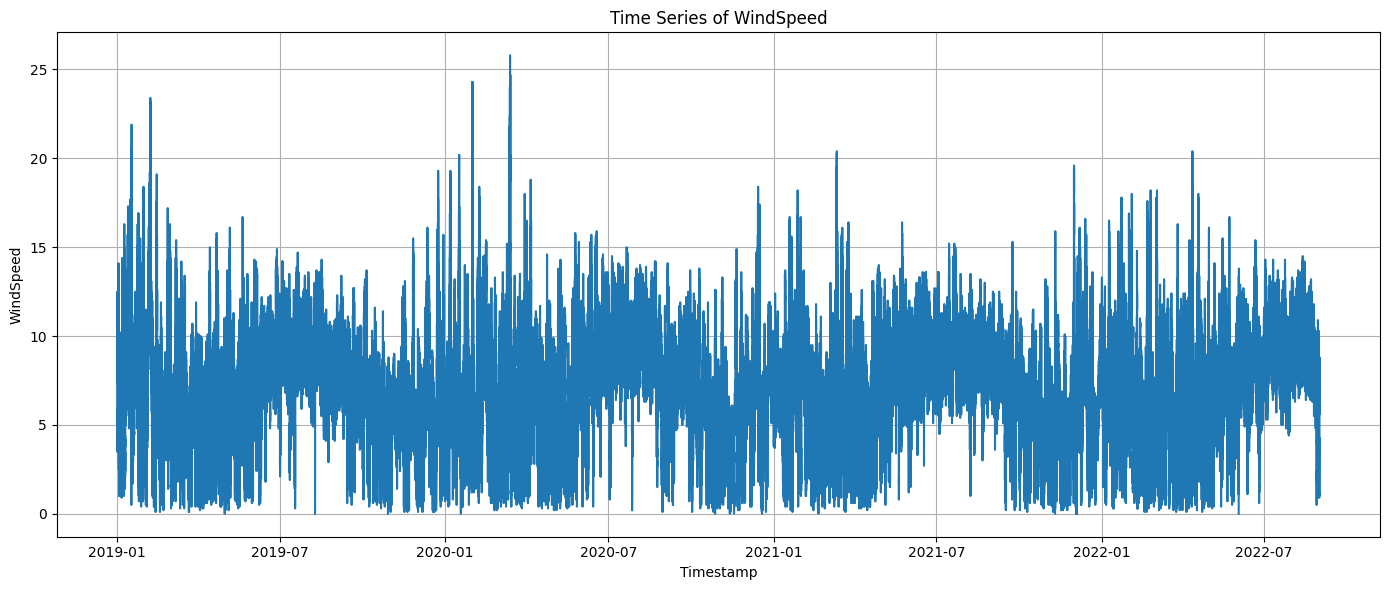

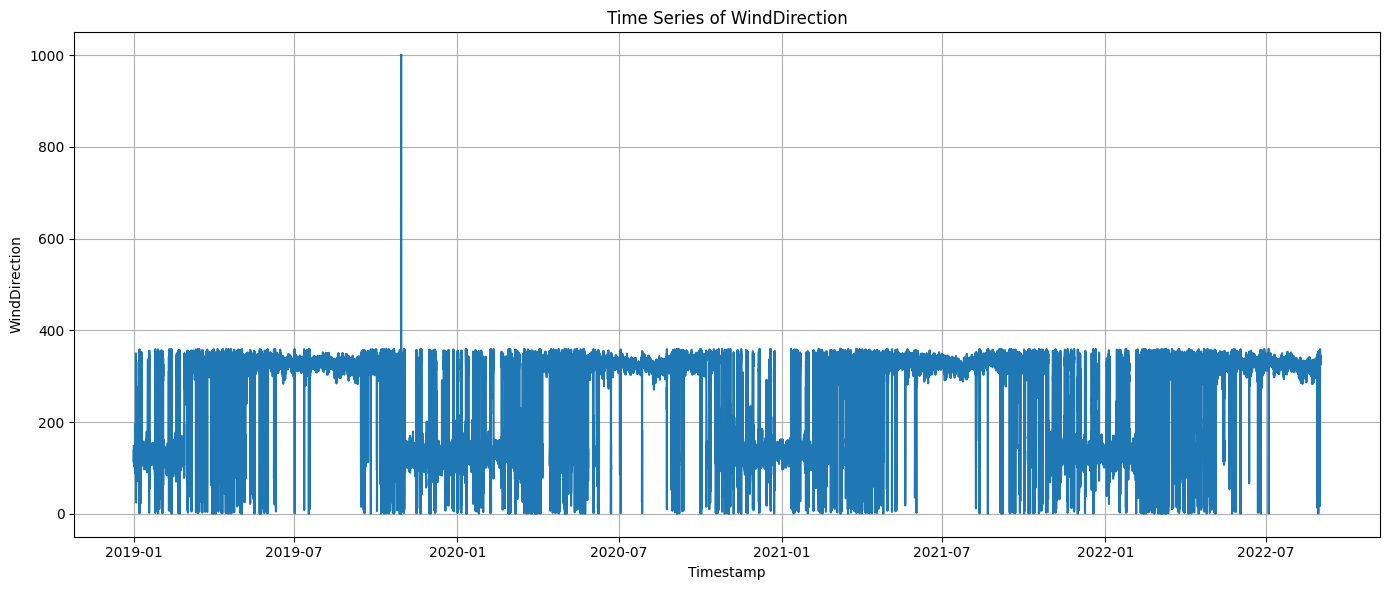

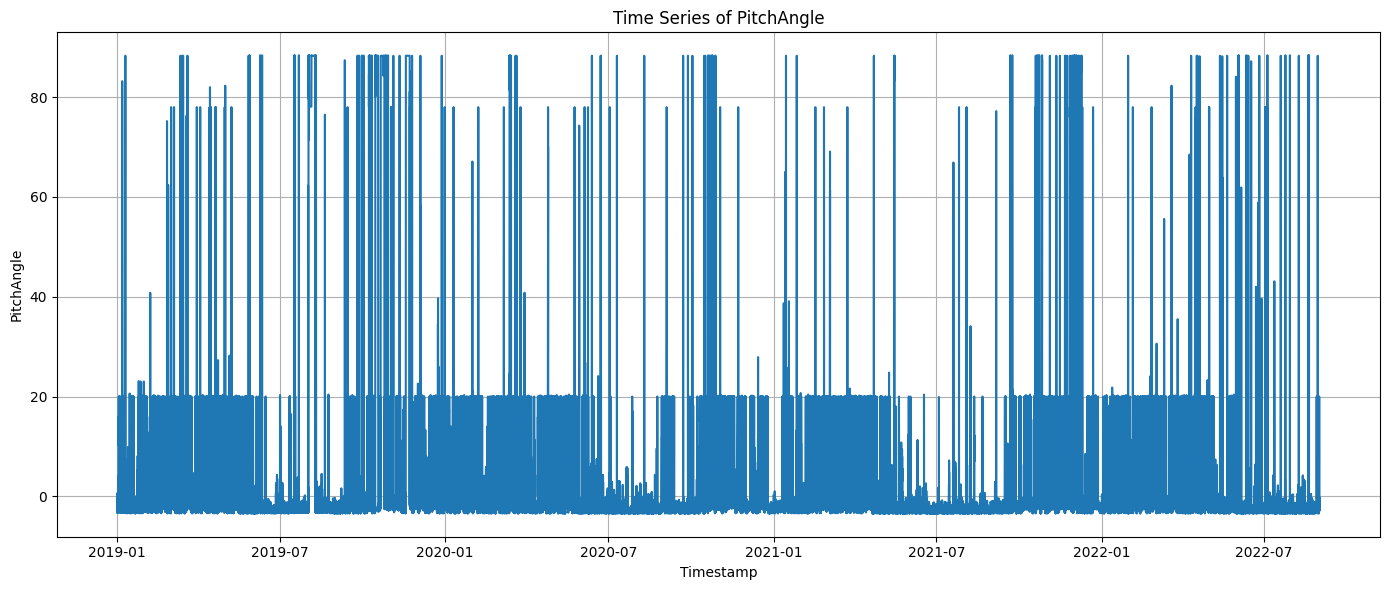

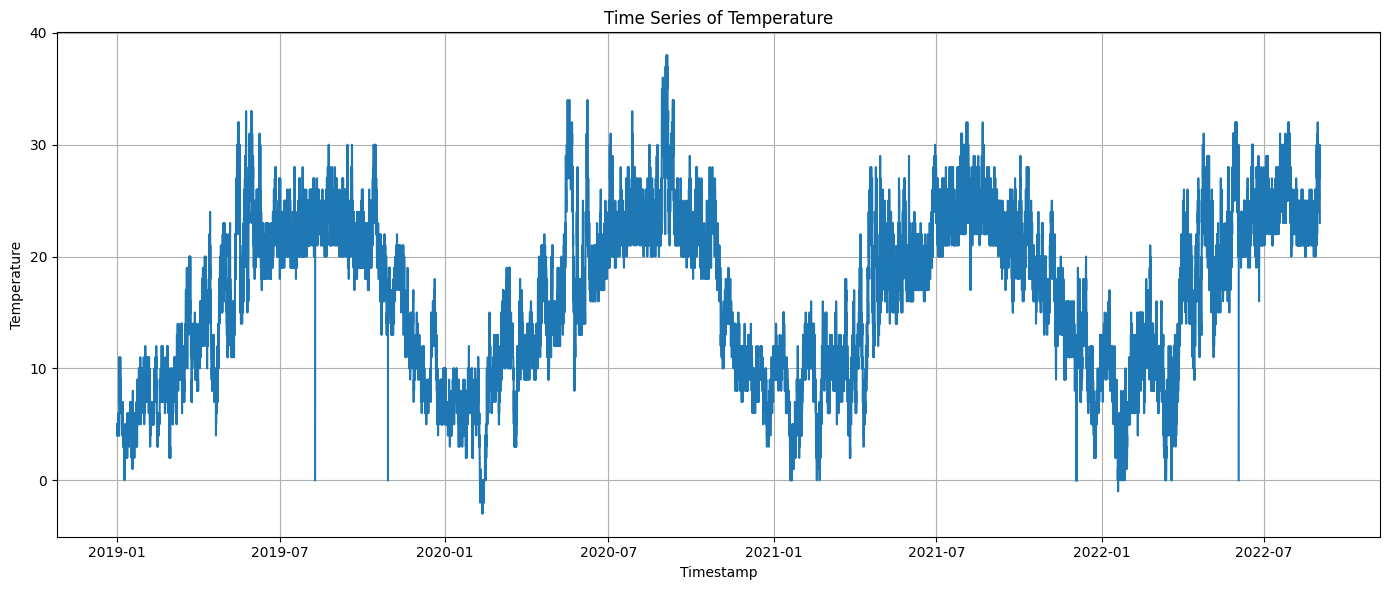

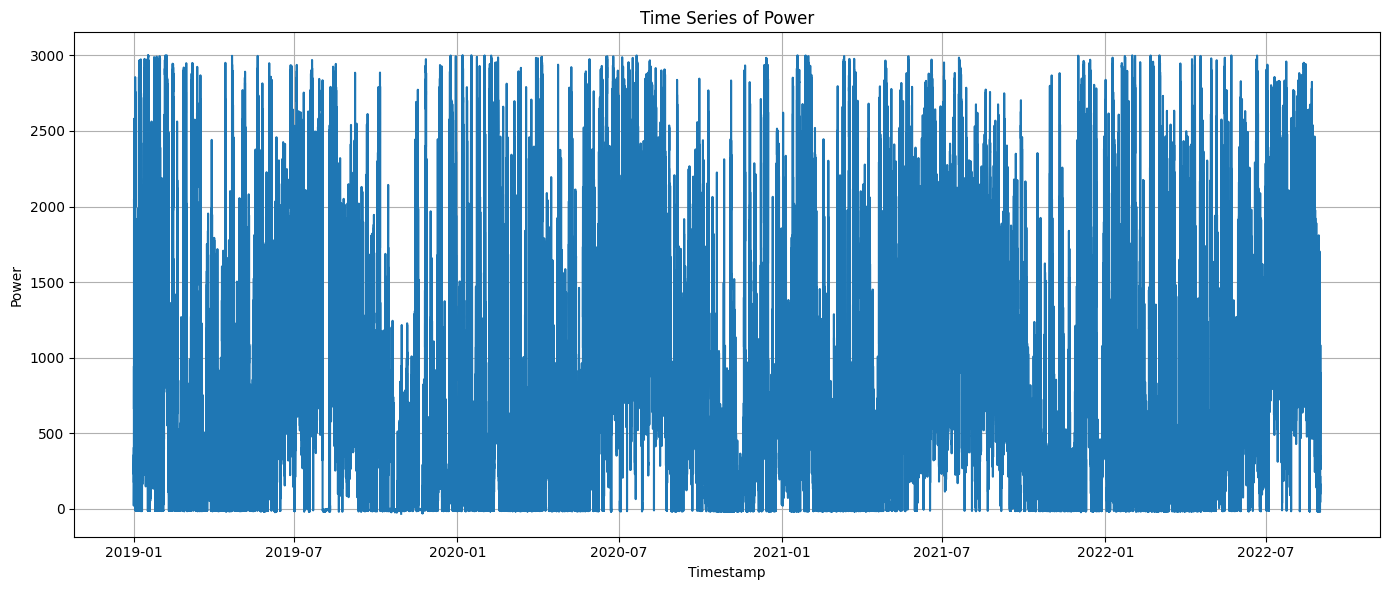

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('dataset.csv')

# Convert the 'TimeStamp' column to datetime format
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])

# Set 'TimeStamp' as the index for easy plotting
data.set_index('TimeStamp', inplace=True)

# Define a function to plot the time series of a single variable
def plot_single_variable(df, variable):
    plt.figure(figsize=(14,6))
    plt.plot(df.index, df[variable])
    plt.xlabel('Timestamp')
    plt.ylabel(variable)
    plt.title(f'Time Series of {variable}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot the time series of each variable
for column in data.columns:
    if column != 'TimeStamp':
        plot_single_variable(data, column)


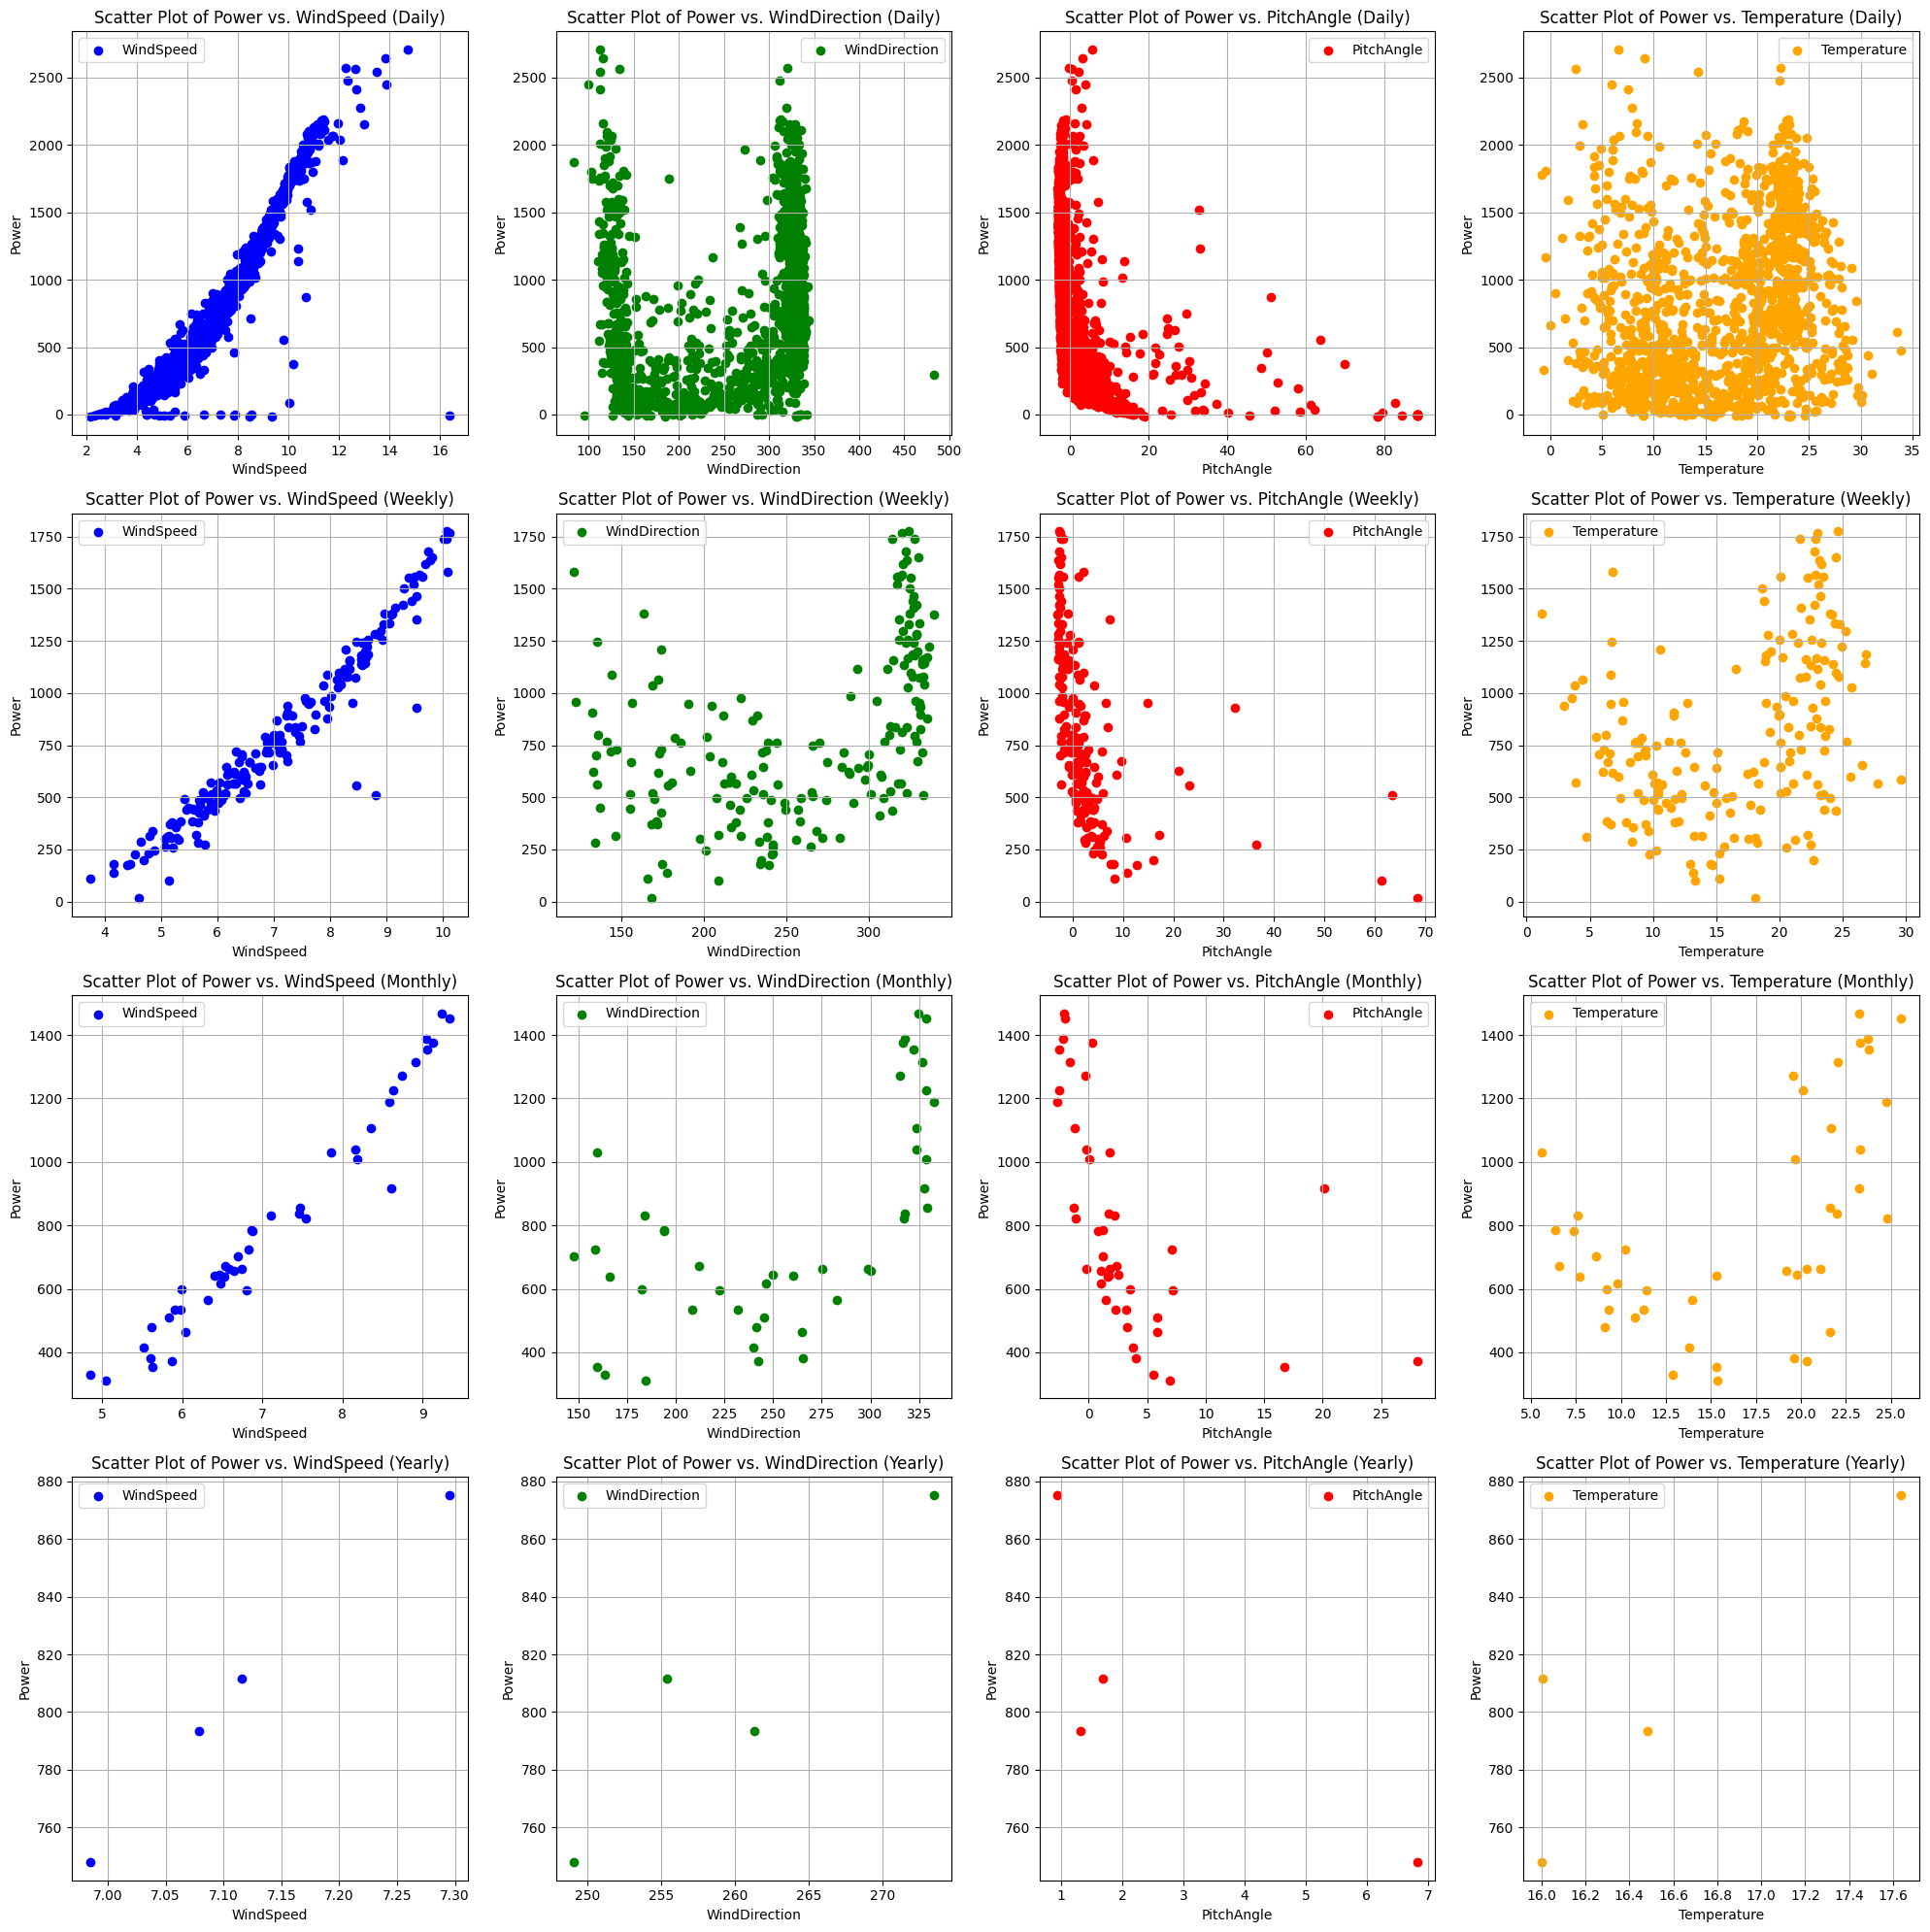

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data into a pandas DataFrame (replace 'dataset.csv' with your actual data file)
data = pd.read_csv("dataset.csv")

# Convert the 'DateTime' column to datetime format
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])

# Set 'DateTime' as the index for easy resampling
data.set_index('TimeStamp', inplace=True)

# Resample data for daily, weekly, monthly, and yearly averages
daily_data = data.resample('D').mean()
weekly_data = data.resample('W').mean()
monthly_data = data.resample('M').mean()
yearly_data = data.resample('Y').mean()

# Define a function to plot the scatter plots for different parameters
def scatter_plot_parameters(ax, data, parameter_name, color, interval):
    ax.scatter(data[parameter_name], data['Power'], label=parameter_name, color=color)
    ax.legend()
    ax.set_xlabel(parameter_name)
    ax.set_ylabel('Power')
    ax.set_title(f'Scatter Plot of Power vs. {parameter_name} ({interval})')
    ax.grid(True)

# Create a 4x4 subplot grid
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))

# Create scatter plots for each time interval in the grid
scatter_plot_parameters(axs[0, 0], daily_data, 'WindSpeed', 'blue', 'Daily')
scatter_plot_parameters(axs[0, 1], daily_data, 'WindDirection', 'green', 'Daily')
scatter_plot_parameters(axs[0, 2], daily_data, 'PitchAngle', 'red', 'Daily')
scatter_plot_parameters(axs[0, 3], daily_data, 'Temperature', 'orange', 'Daily')

scatter_plot_parameters(axs[1, 0], weekly_data, 'WindSpeed', 'blue', 'Weekly')
scatter_plot_parameters(axs[1, 1], weekly_data, 'WindDirection', 'green', 'Weekly')
scatter_plot_parameters(axs[1, 2], weekly_data, 'PitchAngle', 'red', 'Weekly')
scatter_plot_parameters(axs[1, 3], weekly_data, 'Temperature', 'orange', 'Weekly')

scatter_plot_parameters(axs[2, 0], monthly_data, 'WindSpeed', 'blue', 'Monthly')
scatter_plot_parameters(axs[2, 1], monthly_data, 'WindDirection', 'green', 'Monthly')
scatter_plot_parameters(axs[2, 2], monthly_data, 'PitchAngle', 'red', 'Monthly')
scatter_plot_parameters(axs[2, 3], monthly_data, 'Temperature', 'orange', 'Monthly')

scatter_plot_parameters(axs[3, 0], yearly_data, 'WindSpeed', 'blue', 'Yearly')
scatter_plot_parameters(axs[3, 1], yearly_data, 'WindDirection', 'green', 'Yearly')
scatter_plot_parameters(axs[3, 2], yearly_data, 'PitchAngle', 'red', 'Yearly')
scatter_plot_parameters(axs[3, 3], yearly_data, 'Temperature', 'orange', 'Yearly')

# Adjust layout
fig.tight_layout()

# Show the combined plots
plt.show()


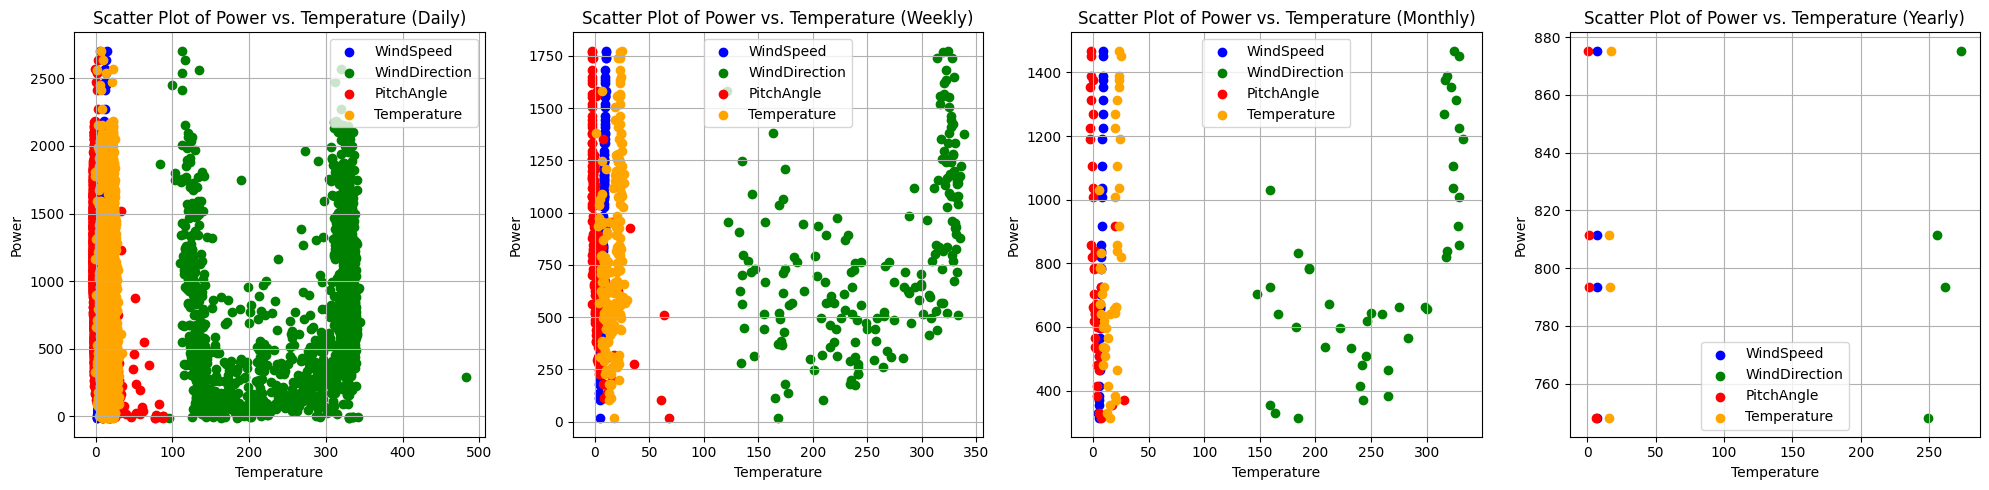

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data into a pandas DataFrame (replace 'dataset.csv' with your actual data file)
data = pd.read_csv("dataset.csv")

# Convert the 'DateTime' column to datetime format
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])

# Set 'DateTime' as the index for easy resampling
data.set_index('TimeStamp', inplace=True)

# Resample data for daily, weekly, monthly, and yearly averages
daily_data = data.resample('D').mean()
weekly_data = data.resample('W').mean()
monthly_data = data.resample('M').mean()
yearly_data = data.resample('Y').mean()

# Define a function to plot the scatter plots for different parameters
def scatter_plot_parameters(ax, data, parameter_name, color, interval):
    ax.scatter(data[parameter_name], data['Power'], label=parameter_name, color=color)
    ax.legend()
    ax.set_xlabel(parameter_name)
    ax.set_ylabel('Power')
    ax.set_title(f'Scatter Plot of Power vs. {parameter_name} ({interval})')
    ax.grid(True)

# Create four separate plots, one for each time interval
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

# Create scatter plots for daily data in the first plot
scatter_plot_parameters(axs[0], daily_data, 'WindSpeed', 'blue', 'Daily')
scatter_plot_parameters(axs[0], daily_data, 'WindDirection', 'green', 'Daily')
scatter_plot_parameters(axs[0], daily_data, 'PitchAngle', 'red', 'Daily')
scatter_plot_parameters(axs[0], daily_data, 'Temperature', 'orange', 'Daily')

# Create scatter plots for weekly data in the second plot
scatter_plot_parameters(axs[1], weekly_data, 'WindSpeed', 'blue', 'Weekly')
scatter_plot_parameters(axs[1], weekly_data, 'WindDirection', 'green', 'Weekly')
scatter_plot_parameters(axs[1], weekly_data, 'PitchAngle', 'red', 'Weekly')
scatter_plot_parameters(axs[1], weekly_data, 'Temperature', 'orange', 'Weekly')

# Create scatter plots for monthly data in the third plot
scatter_plot_parameters(axs[2], monthly_data, 'WindSpeed', 'blue', 'Monthly')
scatter_plot_parameters(axs[2], monthly_data, 'WindDirection', 'green', 'Monthly')
scatter_plot_parameters(axs[2], monthly_data, 'PitchAngle', 'red', 'Monthly')
scatter_plot_parameters(axs[2], monthly_data, 'Temperature', 'orange', 'Monthly')

# Create scatter plots for yearly data in the fourth plot
scatter_plot_parameters(axs[3], yearly_data, 'WindSpeed', 'blue', 'Yearly')
scatter_plot_parameters(axs[3], yearly_data, 'WindDirection', 'green', 'Yearly')
scatter_plot_parameters(axs[3], yearly_data, 'PitchAngle', 'red', 'Yearly')
scatter_plot_parameters(axs[3], yearly_data, 'Temperature', 'orange', 'Yearly')

# Adjust layout
fig.tight_layout()

# Show the combined plots
plt.show()


TIME-SERIES ANALYSIS

In [12]:
def rolling_statistics():
    import matplotlib.pyplot as plt

    # Assuming 'Timestamp' is set as the DataFrame index
    data['Rolling_Mean_Power'] = data['Power'].rolling(window=20).mean()
    data['Rolling_Std_Power'] = data['Power'].rolling(window=20).std()

    data['Rolling_Mean_WindSpeed'] = data['WindSpeed'].rolling(window=20).mean()
    data['Rolling_Std_WindSpeed'] = data['WindSpeed'].rolling(window=20).std()

    data['Rolling_Mean_WindDirection'] = data['WindDirection'].rolling(window=20).mean()
    data['Rolling_Std_WindDirection'] = data['WindDirection'].rolling(window=20).std()

    data['Rolling_Mean_PitchAngle'] = data['PitchAngle'].rolling(window=20).mean()
    data['Rolling_Std_PitchAngle'] = data['PitchAngle'].rolling(window=20).std()

    data['Rolling_Mean_Temperature'] = data['Temperature'].rolling(window=20).mean()
    data['Rolling_Std_Temperature'] = data['Temperature'].rolling(window=20).std()

    # Create subplots in a table format
    num_rows = 5
    num_cols = 2

    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 20))

    # Flatten the axes array to make it easier to access individual axes
    axes = axes.flatten()

    # Plot each variable and its corresponding rolling mean and standard deviation
    variables = ['Power', 'WindSpeed', 'WindDirection', 'PitchAngle', 'Temperature']
    rolling_mean_columns = ['Rolling_Mean_Power', 'Rolling_Mean_WindSpeed', 'Rolling_Mean_WindDirection', 'Rolling_Mean_PitchAngle', 'Rolling_Mean_Temperature']
    rolling_std_columns = ['Rolling_Std_Power', 'Rolling_Std_WindSpeed', 'Rolling_Std_WindDirection', 'Rolling_Std_PitchAngle', 'Rolling_Std_Temperature']

    for i, (variable, mean_column, std_column) in enumerate(zip(variables, rolling_mean_columns, rolling_std_columns)):
        axes[i].plot(data.index, data[variable], label=variable)
        axes[i].plot(data.index, data[mean_column], label='Rolling Mean')
        axes[i].plot(data.index, data[std_column], label='Rolling Std')
        axes[i].set_title(f'Time-Series with Rolling Mean and Std of {variable}')
        axes[i].set_xlabel('Timestamp')
        axes[i].set_ylabel('Values')
        axes[i].legend()
        axes[i].grid(True)

    # Hide any unused axes
    for i in range(len(variables), num_rows * num_cols):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()


CORRELATION ANALYSIS

               WindSpeed  WindDirection  PitchAngle  Temperature     Power
WindSpeed       1.000000       0.233183   -0.295842     0.164461  0.922914
WindDirection   0.233183       1.000000   -0.118612     0.435687  0.196753
PitchAngle     -0.295842      -0.118612    1.000000    -0.020883 -0.340447
Temperature     0.164461       0.435687   -0.020883     1.000000  0.135993
Power           0.922914       0.196753   -0.340447     0.135993  1.000000


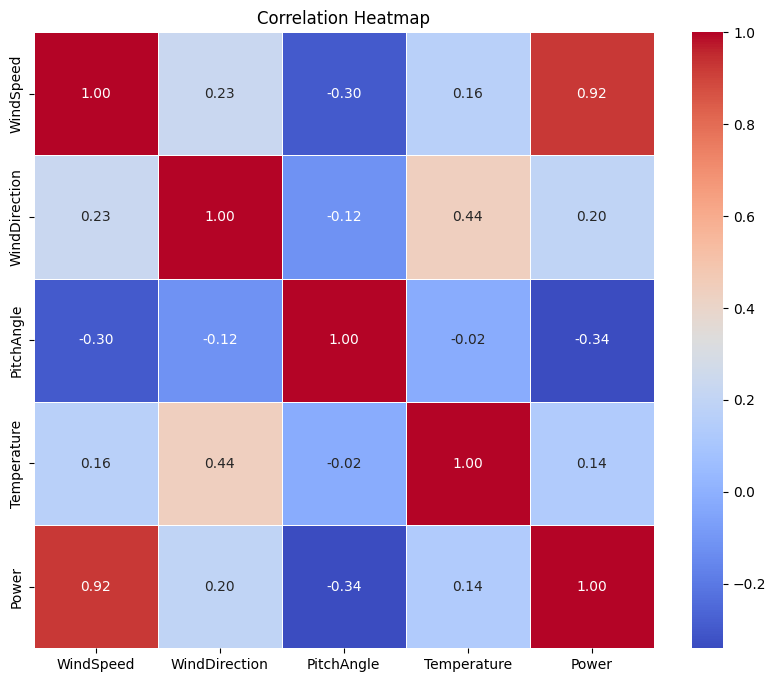

In [13]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Display the correlation matrix
print(correlation_matrix)

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

DATA PREPROCESSING

In [14]:
import pandas as pd
import numpy as np

# Load the data into a DataFrame (replace 'dataset.csv' with your actual data file)
data = pd.read_csv('dataset.csv')

# Function to detect outliers using IQR method
def detect_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    IQR = q3 - q1
    lower_limit = q1 - (1.5 * IQR)
    upper_limit = q3 + (1.5 * IQR)
    outliers = column[(column < lower_limit) | (column > upper_limit)]
    return outliers

# Function to replace outliers with interpolation
def handle_outliers(df):
    for column in df.columns:
        if column != 'TimeStamp':
            outliers = detect_outliers(df[column])
            df.loc[outliers.index, column] = np.nan
            df[column] = df[column].interpolate(method="linear")
    return df

# Function to check for outliers in the DataFrame
def check_outliers(df):
    outliers_found = {}
    for column in df.columns:
        if column != 'TimeStamp':
            outliers = detect_outliers(df[column])
            if not outliers.empty:
                outliers_found[column] = outliers
    return outliers_found

def remove_remaining_outliers(df):
    for column in df.columns:
        if column != 'TimeStamp':
            outliers = detect_outliers(df[column])
            df.drop(outliers.index, inplace=True)
    return df

# Check the outliers before handling
outliers_before_handling = check_outliers(data)
if outliers_before_handling:
    print("OUTLIERS FOR EACH COLUMN BEFORE HANDLING:")
    for column, outliers in outliers_before_handling.items():
        print(f"Column: {column}")
        print(outliers)
        print("----------------------------")
else:
    print("No outliers found before handling.")

# Handle the outliers using the IQR method
data = handle_outliers(data)

# Check the outliers after handling
outliers_after_handling = check_outliers(data)
if outliers_after_handling:
    print("\nOUTLIERS FOR EACH COLUMN AFTER HANDLING:")
    for column, outliers in outliers_after_handling.items():
        print(f"Column: {column}")
        print(outliers)
        print("----------------------------")
else:
    print("\nNo outliers found after handling.")

outliers_before_removing  = check_outliers(data)
if outliers_before_removing:
    print("OUTLIERS FOR EACH COLUMN BEFORE REMOVING:")
    for column, outliers in outliers_before_removing.items():
        print(f"Column: {column}")
        print(outliers)
        print("----------------------------")
else:
    print("No outliers found before removing.")

data = remove_remaining_outliers(data)

outliers_after_removing = check_outliers(data)
if outliers_after_removing:
    print("\nOUTLIERS FOR EACH COLUMN AFTER REMOVING:")
    for column, outliers in outliers_after_removing.items():
        print(f"Column: {column}")
        print(outliers)
        print("----------------------------")
else:
    print("\nNo outliers found after removing.")

# Save the data to a new CSV file
data.to_csv('edited_dataset.csv', index=False)






OUTLIERS FOR EACH COLUMN BEFORE HANDLING:
Column: WindSpeed
1162      16.299999
1163      15.400000
1164      14.900000
1166      15.000000
1708      15.700000
            ...    
177243    15.400000
178307    16.700001
182455    14.900000
182485    15.400000
182570    15.000000
Name: WindSpeed, Length: 1096, dtype: float64
----------------------------
Column: WindDirection
43409    1000.0
43410    1000.0
43411    1000.0
43412    1000.0
43413    1000.0
43414    1000.0
43415    1000.0
43416    1000.0
43417    1000.0
43418    1000.0
43428    1000.0
43440    1000.0
43441    1000.0
43444    1000.0
Name: WindDirection, dtype: float64
----------------------------
Column: PitchAngle
230        4.1
231        1.9
247        1.5
254        2.2
269       15.5
          ... 
192721    20.0
192722    20.0
192723     5.7
192724    14.9
192725     5.7
Name: PitchAngle, Length: 33229, dtype: float64
----------------------------
Column: Power
1758      2976.899902
2317      2987.699951
2318      2993.

In [15]:
def handle_missing_values():
    data = pd.read_csv('edited_dataset.csv')
    print("Before replacing missing values:")
    print(data.isna().sum())

    def replace_missing_values(df, column):
        replaced_value = data[column].quantile(0.999)
        df[column] = df[column].apply(lambda handle_missing_values: replaced_value if pd.isna(handle_missing_values) else handle_missing_values)
        return df

    for column in data.columns:
        if column != 'TimeStamp':
            data = replace_missing_values(data, column)

    data.interpolate(method="linear", inplace=True)

    print("After replacing missing values:")
    print(data.isna().sum())

handle_missing_values()
data.to_csv('edited_dataset.csv', index=False)


Before replacing missing values:
TimeStamp        0
WindSpeed        0
WindDirection    0
PitchAngle       0
Temperature      0
Power            0
dtype: int64
After replacing missing values:
TimeStamp        0
WindSpeed        0
WindDirection    0
PitchAngle       0
Temperature      0
Power            0
dtype: int64


In [16]:
print(data.duplicated().sum())
data = pd.read_csv('edited_dataset.csv')
def handle_duplicates(df):
    # Handling duplicated values
    duplicated_rows = df.duplicated(keep='first')
    print("Duplicated Rows:")
    print(df[duplicated_rows])
    if duplicated_rows.any():
        df.drop_duplicates(keep='first', inplace=True)
        print("After handling duplicated values:")
        print(df.duplicated().sum())
    else:
        print("No duplicated rows found.")
    return df


data = handle_duplicates(data)
data.duplicated().sum()
data.to_csv('edited_dataset.csv', index=False)

0
Duplicated Rows:
Empty DataFrame
Columns: [TimeStamp, WindSpeed, WindDirection, PitchAngle, Temperature, Power]
Index: []
No duplicated rows found.


HYPOTHESIS TESTING

In [17]:
data = pd.read_csv('edited_dataset.csv')
from scipy.stats import pearsonr

# Example hypothesis testing: Wind Speed vs. Power
# H0: There is no significant correlation between Wind Speed and Power.
# H1: There is a significant correlation between Wind Speed and Power.

correlation_coefficient, p_value = pearsonr(data['WindSpeed'], data['Power'])
print("Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

alpha = 0.05  # Set the significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant correlation.")
    print("Dataset is suitable for linear regression.")
    print("Dataset is stationary.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation.")
    print("Dataset is not suitable for linear regression.")
    print("Dataset is not stationary.")


Correlation Coefficient: 0.923120455104082
P-value: 0.0
Reject the null hypothesis: There is a significant correlation.
Dataset is suitable for linear regression.
Dataset is stationary.
